<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 4

# Question 1 

Try to denoise the image (ex2n.png) by implementing a blur with an FFT.

The image (ex2n.png) is blurred by a horizontal noise. This question is asking you to remove the noise by FFT. 


Text(0.5, 1.0, 'Original image')

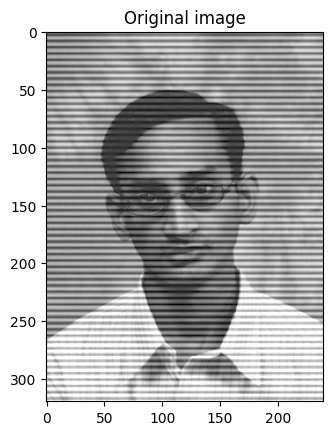

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fftpack
from scipy.fft import fft2,ifft2,fftshift,ifftshift


def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

im = plt.imread('ex2n.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Filtered Spectrum')

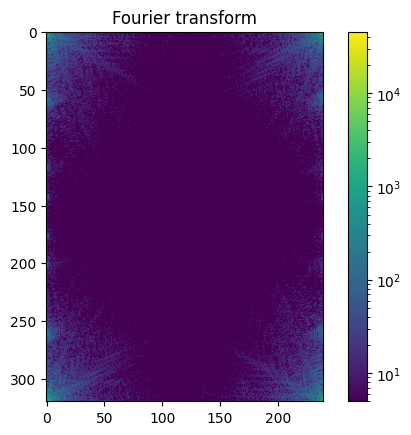

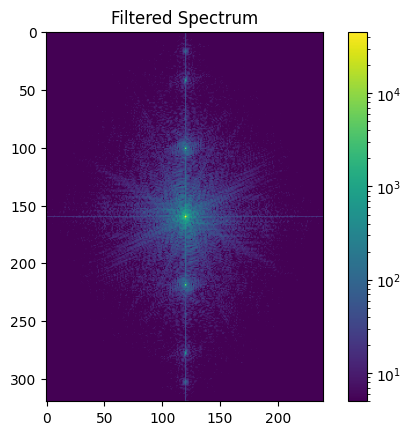

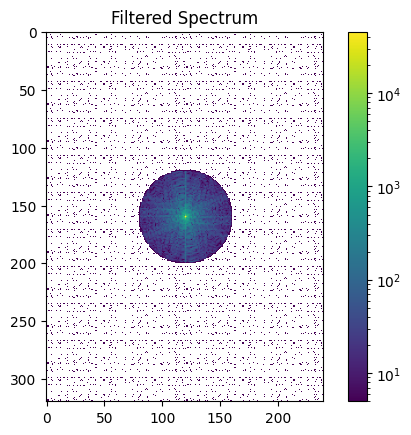

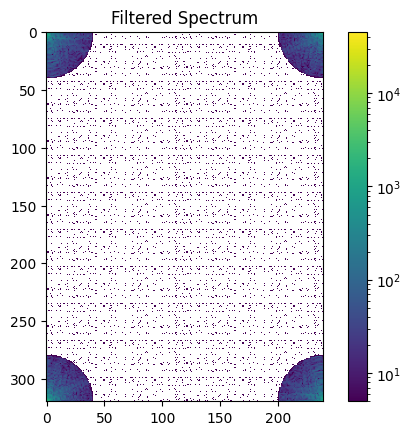

In [13]:
## answer 1
im_fft = fft2(im) # converts the image from spatial domain to the frequency domain


plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')


## In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.
from scipy.fft import fftshift,ifftshift

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1 # represents the fractions of Fourier coefficients to keep during teh filtering process

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

im_fft3 = fftshift(im_fft.copy()) 
#  Perform a shift operation on the Fourier transform using fftshift, 
# which swaps the quadrants of the image to move the zero frequency components to the center.
im_fft4= np.zeros(im_fft.shape,dtype=complex)
# Create an empty complex array of the same shape as the original Fourier transform. 
# This array will store the filtered Fourier coefficients.

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# im_fft3=im_fft3-im_fft2
for i in range(r//2-100,r//2+100):
    for j in range(c//2-100,c//2+100):
        if (i-r//2)**2+(j-c//2)**2<40**2:
            im_fft4[i,j]=im_fft3[i,j]
im_fft5=ifftshift(im_fft4)




plt.figure()
plot_spectrum(im_fft3)
plt.title('Filtered Spectrum')
plt.figure()
plot_spectrum(im_fft4)
plt.title('Filtered Spectrum')
plt.figure()
plot_spectrum(im_fft5)
plt.title('Filtered Spectrum')



Text(0.5, 1.0, 'Reconstructed Image')

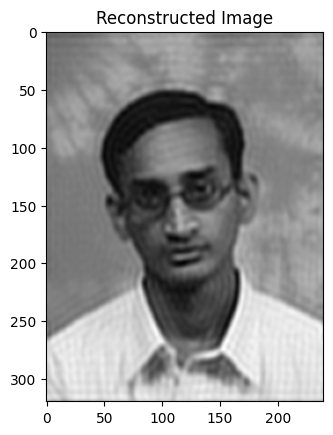

In [3]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.

im_new = ifft2(im_fft5).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

# Question 2

Try to denoise the image (ex2n.png) by implementing a blur with 2D multilevel Discrete wavelet transform.

The image (ex2n.png) is blurred by a horizontal noise. This question is asking you to remove the noise by 2D multilevel Discrete wavelet transform. 


Text(0.5, 1.0, 'Original image')

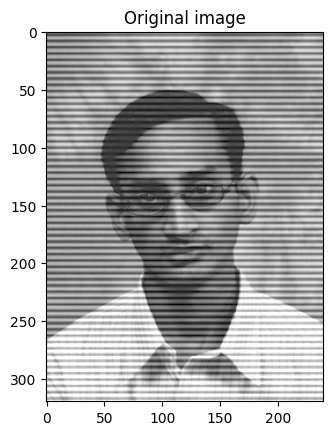

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pywt


im = plt.imread('ex2n.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [5]:
## answer 2



In [6]:
coeffs3 = pywt.wavedec2(im, 'bior1.3')
ii=4
coeffs3[ii] = tuple([np.zeros_like(v) if np.allclose(v , coeffs3[ii][0]) else v for v in coeffs3[ii]])
ii=5
coeffs3[ii] = tuple([np.zeros_like(v) if np.allclose(v , coeffs3[ii][0]) else v for v in coeffs3[ii]])

imw=pywt.waverec2(coeffs3, 'bior1.3')

Text(0.5, 1.0, 'Reconstructed Image')

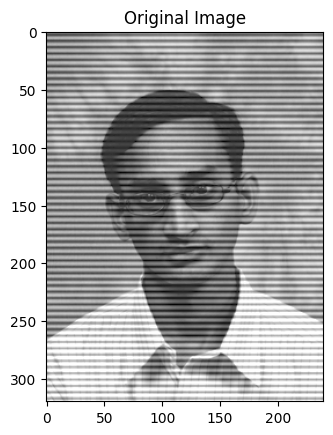

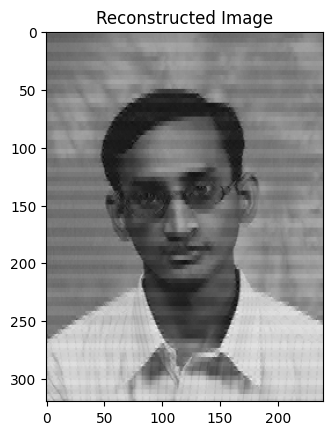

In [7]:
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original Image')
plt.figure()
plt.imshow(imw, plt.cm.gray)
plt.title('Reconstructed Image')

## Question 3

In this question, we are going to use FFT to approximate the derivatives of a function.

Enter

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

## Q3A


Write a generic function `get_derivative(f_values,n1,n2)` where 
- `f_values` is a 2D np.array containing the discretized values of a 2D-function `f`, 
- `n1` the order of derivative of `f` with respect to $x$ and 
- `n2` the order of derivative of `f` with respect to $y$.

It outputs the corresponding derivative using `scipy.fft`.

Namely,
$$get\_ derivative(f,n1,n2)=\frac{\partial^{n1}}{\partial x^{n1}}\frac{\partial^{n2}}{\partial y^{n2}}f(x,y).$$

You may assume the function `f` is smooth and the f_values are taken on $(-\pi,\pi)\times(-\pi,\pi)$ with $100 \times 100$ gridpoints.

In [9]:
# answer 3a

# an example of f
def f(x,y):
    return np.sin(x)*np.cos(y)

def get_derivative(f_values, n1, n2):
    Nx, Ny = f_values.shape
    dx = 2*np.pi/Nx
    dy = 2*np.pi/Ny
    fft_f = fft.fft2(f_values)
    freq_x = fft.fftfreq(Nx, dx)*2*np.pi
    freq_y = fft.fftfreq(Ny, dy)*2*np.pi
    print(freq_x)
    freq_x_grid, freq_y_grid = np.meshgrid(freq_x, freq_y, indexing='ij')
    fft_df_dxdy = (1j*freq_x_grid)**n1 * (1j*freq_y_grid)**n2 * fft_f
    df_dxdy = np.real(fft.ifft2(fft_df_dxdy))
    return df_dxdy



## Q3B

Now suppose `n1`= 1 and `n2`= 1. Plot two graphs:
one for approximating the mixed derivative of $f(x,y)=sin(x)cos(y)$ using `get_derivative()` and next to the true derivative given using `true_derivative()`.

The function values should be discretized on $(-\pi,\pi)\times(-\pi,\pi)$ with $100 \times 100$ gridpoints.

Plot the graphs using `plt.imshow()`.

Enter

In [10]:
def f(x,y):
    return np.sin(x)*np.cos(y)

def true_derivative(x,y):
    return -np.cos(x)*np.sin(y)


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49. -50. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]


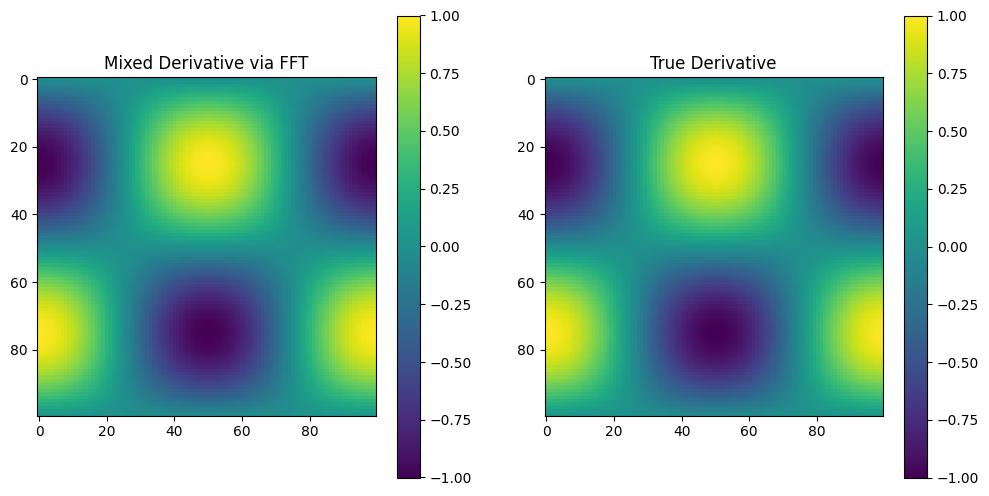

L2-error :  7.415024705616123e-12


In [11]:
# answer 3b
x, y = np.meshgrid(np.linspace(-np.pi, np.pi, 100, endpoint=False), 
                   np.linspace(-np.pi, np.pi, 100, endpoint=False))
n1=1
n2=1
f_values = f(x, y)
mixed_derivative = get_derivative(f_values, n1, n2)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

img1 = ax1.imshow(mixed_derivative)
fig.colorbar(img1,ax=ax1)
ax1.set_title('Mixed Derivative via FFT')

img2=ax2.imshow(true_derivative(x,y))
fig.colorbar(img2,ax=ax2)
ax2.set_title('True Derivative')

plt.show()

print("L2-error : ", np.linalg.norm(mixed_derivative-true_derivative(x,y)))

plt.show()

In [ ]:
# 2DFFT

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('..','DATA','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

fig,axs = plt.subplots(1,3)

# Plot image
img = axs[0].imshow(B)
img.set_cmap('gray')
axs[0].axis('off')

# Compute row-wise FFT

Cshift = np.zeros_like(B,dtype='complex_')
C = np.zeros_like(B,dtype='complex_')

for j in range(B.shape[0]):
    Cshift[j,:] = np.fft.fftshift(np.fft.fft(B[j,:]))
    C[j,:] = np.fft.fft(B[j,:])
    
img = axs[1].imshow(np.log(np.abs(Cshift)))
img.set_cmap('gray')
axs[1].axis('off')

# Compute column-wise FFT

D = np.zeros_like(C)
for j in range(C.shape[1]):
    D[:,j] = np.fft.fft(C[:,j])

img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

plt.show()

# Much more efficient to use fft2
D = np.fft.fft2(B)